In [3]:
#Next we install the libraries needed to complete the assignment
!pip install datasets
!pip install transformers[torch]
!pip install accelerate -U
!pip install accelerate>=0.20.1
!pip install --upgrade nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 23.8 MB/s eta 0:00:00


## We load the libraries that will help us in our EDA

In [4]:
import os
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import plotly.express as px
import nltk.stem
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import re,string, unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from string import punctuation
from datasets import load_dataset
from nltk.corpus import wordnet
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import string
from textblob import TextBlob
import re
import pickle

In [5]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [6]:
# Load the dataset from a url link

# Load the CSV file into a DataFrame

url = "https://github.com/Azubi-Africa/Career_Accelerator_P5-NLP/raw/master/zindi_challenge/data/Train.csv"

df = pd.read_csv(url)

# Data Cleaning

In [7]:
# Before we perfom our EDA, we need to clean our data to ensure the data has no significant issues

In [8]:
#check for the existence of missing values
data=[df]
names=["df"]


for m, i in zip(data, names):
    print(f"the missing values in the", i, "dataset are: ", "\n\n", m.isna().sum(), "\n\n", "---"*20)

the missing values in the df dataset are:  

 tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64 

 ------------------------------------------------------------


In [9]:
#Let us start by removing the missing values using the following code
df = df[~df.isna().any(axis=1)]

In [10]:
# now lets convert all the text to lowercase to create uniformity
df["safe_text"]= df["safe_text"].str.lower()

In [11]:
# Now we remove punctuations, first we create function, then apply it on our data set
 # for the fuction, we use the following code
def punctuation_remover(text):
  return re.sub("[^\w\s]", repl= " ", string=text)

In [13]:
# Apply the fuction
df["safe_text"]= df["safe_text"].apply(punctuation_remover)

In [14]:
# Now lets remove the stop words
# firstly lets look at the stop words, we use the subsequent code
" ".join(STOPWORDS)

"to any in those who's we down otherwise myself out both since is about hers where doing http can't before they'd i'm were didn't i'd how's when's each same their after other under i herself themselves ourselves over it's you'll you between he'd they are he shan't no these k below you'd haven't can www as i'll we're i've you've com she'll theirs against your why isn't more at than did shouldn't however off only further into we've do just r by was most so him let's me like shall a while during yours ours some through which hadn't how should this else and that's why's then where's being again the if hasn't have all had until we'd for too he's aren't once our they're my cannot he'll has himself its from who does here because she's his she'd or yourselves would we'll itself wasn't could she also couldn't don't they've wouldn't get above ever they'll an ought few you're yourself therefore nor own such been them what very weren't when up of am here's on what's mustn't doesn't with be having 

In [15]:
# Next we create a function to remove these stopwords
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [16]:
# Now we can remove the hyperlinks
df['safe_text'] = df['safe_text'].str.replace(r"http\S+", "", regex=True)
df

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,me amp the big homie meanboy3000 meanboy m...,0.0,1.000000
1,E3303EME,i m 100 thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,whatcausesautism vaccines do not vaccinate y...,-1.0,1.000000
3,1DR6ROZ4,i mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,thanks to user catch me performing at la nui...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,living in a time where the sperm i used to was...,1.0,1.000000
9997,WKKPCJY6,user user in spite of all measles outbrea...,1.0,0.666667
9998,ST3A265H,interesting trends in child immunization in ok...,0.0,1.000000
9999,6Z27IJGD,cdc says measles are at highest levels in deca...,0.0,1.000000


# The EDA Section of the Sentiment Analysis Project

In [17]:
#Lets look at our data
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,me amp the big homie meanboy3000 meanboy m...,0.0,1.0
1,E3303EME,i m 100 thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,whatcausesautism vaccines do not vaccinate y...,-1.0,1.0
3,1DR6ROZ4,i mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,thanks to user catch me performing at la nui...,0.0,1.0


In [18]:
# lets look at the data types in our df
df.dtypes

tweet_id      object
safe_text     object
label        float64
agreement    float64
dtype: object

In [19]:
#we use .shape method to understand the dimensions of our df
df.shape

(9999, 4)

In [20]:
#We use the .describe method to get the mean, standard deviatio, value count and quatile range of our data
df.describe()

,label,agreement
count,9999.00000,9999.000000
mean,0.30153,0.854252
std,0.64674,0.180707
min,-1.00000,0.333333
25%,0.00000,0.666667
50%,0.00000,1.000000
75%,1.00000,1.000000
max,1.00000,1.000000


In [21]:
#Lets take a closer look at the safe_text column
df['safe_text']

0        me  amp  the big homie meanboy3000  meanboy  m...
1        i m 100  thinking of devoting my career to pro...
2         whatcausesautism vaccines  do not vaccinate y...
3        i mean if they immunize my kid with something ...
4        thanks to  user  catch me performing at la nui...
                               ...                        
9996     living in a time where the sperm i used to was...
9997      user   user   in spite of all measles outbrea...
9998     interesting trends in child immunization in ok...
9999     cdc says measles are at highest levels in deca...
10000    pneumonia vaccine  for women w risk of pulmona...
Name: safe_text, Length: 9999, dtype: object

''

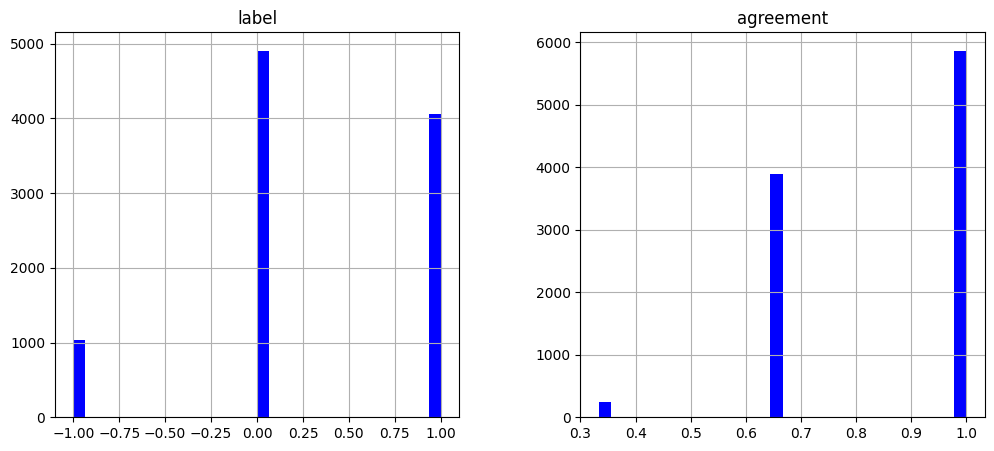

In [22]:
#we create histograms for our numerical columns
df.hist(bins= 30, figsize = (12,5), color = 'b')
;

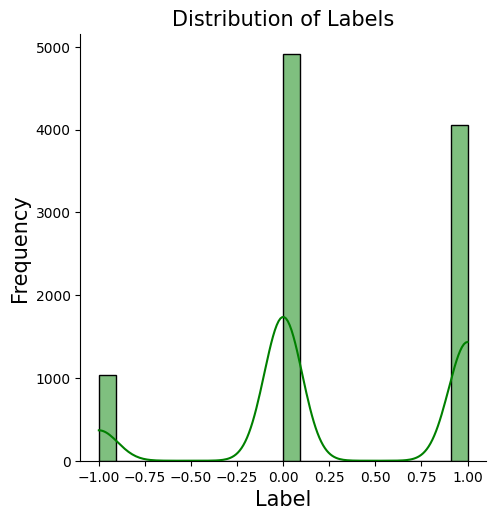

In [23]:
# Now we creare a distplot
sns.displot(df['label'], color ='green', kde = True, rug = False)
plt.xlabel('Label', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Labels', fontsize = 15)
plt.show()

''

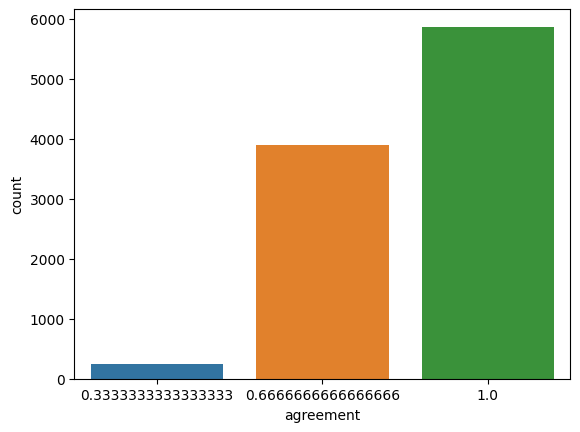

In [24]:
#Lets look at the count of aggrement
sns.countplot(x=df['agreement'] ,data=df)
;

In [25]:
df_2 = df.copy()

In [26]:
# check the new df
df_2.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,me amp the big homie meanboy3000 meanboy m...,0.0,1.0
1,E3303EME,i m 100 thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,whatcausesautism vaccines do not vaccinate y...,-1.0,1.0
3,1DR6ROZ4,i mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,thanks to user catch me performing at la nui...,0.0,1.0


In [27]:
#Now lets determine the lenght of each tweet
df_2['length'] = df_2['safe_text'].apply(len)

In [28]:
#Lets check to see if the new column has been added
df_2.head()

,tweet_id,safe_text,label,agreement,length
0,CL1KWCMY,me amp the big homie meanboy3000 meanboy m...,0.0,1.0,90
1,E3303EME,i m 100 thinking of devoting my career to pro...,1.0,1.0,140
2,M4IVFSMS,whatcausesautism vaccines do not vaccinate y...,-1.0,1.0,55
3,1DR6ROZ4,i mean if they immunize my kid with something ...,-1.0,1.0,138
4,J77ENIIE,thanks to user catch me performing at la nui...,0.0,1.0,106


''

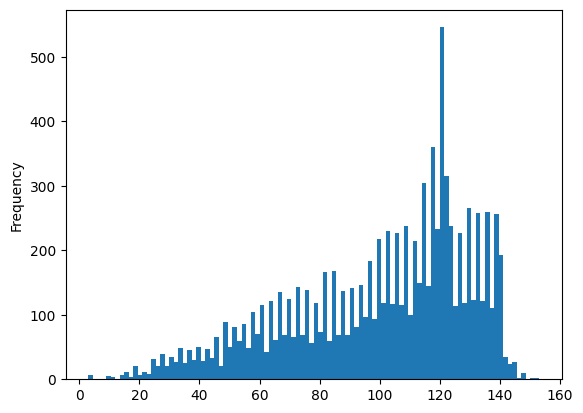

In [29]:
#Lets now look at the distribution of the tweets
df_2['length'].plot(bins=100, kind ='hist')
;

In [30]:
#We can look at the smallest tweet in the df
df_2.describe()

,label,agreement,length
count,9999.00000,9999.000000,9999.000000
mean,0.30153,0.854252,99.921092
std,0.64674,0.180707,29.868721
min,-1.00000,0.333333,3.000000
25%,0.00000,0.666667,80.000000
50%,0.00000,1.000000,107.000000
75%,1.00000,1.000000,122.000000
max,1.00000,1.000000,153.000000


In [31]:
df_2[df_2['length']==3]['safe_text'].iloc[0]

'mmr'

In [32]:
# The smallest tweet in our df is MMR

In [33]:
#New lets look at the tweets with average length
df_2[df_2['length']==107]

,tweet_id,safe_text,label,agreement,length
56,UW0BXIRO,user 1 marin county school board sides wit...,0.0,0.666667,107
183,E3ZXRHQJ,some say this brooklyn is biggie mogul pres...,0.0,1.000000,107
403,XCPLICRG,user i m suspicious that the vaccine wears o...,-1.0,0.666667,107
453,3X59FI7E,this is so disappointing terrifying user 1 ...,-1.0,0.333333,107
459,3AM7OQA9,the measles killed me multiple times on the o...,0.0,1.000000,107
...,...,...,...,...,...
9666,QN0AKKUZ,user after putting mms of kids at risk for d...,1.0,0.666667,107
9773,DH8JYA7W,safety in the arms of god is not immunity insu...,0.0,0.666667,107
9845,N920B92Y,if your reading this you are obligated to come...,0.0,0.666667,107
9854,ARPS1UBS,my fav part of the pachealthsummit can t wai...,1.0,0.666667,107


In [34]:
# Now we can make a the tweets with the longest length
df_2[df_2['length']==153]

,tweet_id,safe_text,label,agreement,length
162,62MRY6EZ,we didnt get vaccinated amp we survived i ha...,-1.0,0.666667,153


In [35]:
#Now we can separate, positve, negative and neutral tweets
#lets start with the positve ones
positive = df_2[df_2['label']==1]

In [36]:
positive.head()

,tweet_id,safe_text,label,agreement,length
1,E3303EME,i m 100 thinking of devoting my career to pro...,1.0,1.000000,140
5,OVNPOAUX,user a nearly 67 year old study when mental ...,1.0,0.666667,131
6,JDA2QDV5,study of more than 95 000 kids finds no link b...,1.0,0.666667,81
7,S6UKR4OJ,psa vaccinate your fucking kids,1.0,1.000000,32
8,V6IJATBE,coughing extra on the shuttle and everyone thi...,1.0,0.666667,90


In [37]:
# lets now look look at the number of positve tweets
num_positive_rows = len(positive)

print(num_positive_rows)

4053


In [38]:
#lets start with the negative ones
negative = df_2[df_2['label']==-1]
negative.head()

,tweet_id,safe_text,label,agreement,length
2,M4IVFSMS,whatcausesautism vaccines do not vaccinate y...,-1.0,1.000000,55
3,1DR6ROZ4,i mean if they immunize my kid with something ...,-1.0,1.000000,138
24,89AB846O,user cdc lied and hid data that black boys ...,-1.0,1.000000,131
25,XSXFN1C8,user vaccines causing autism,-1.0,1.000000,30
35,6PMH7C56,user user other than that his defense is ...,-1.0,0.333333,121


In [39]:
num_negative_rows = len(negative)

print(num_negative_rows)

1038


In [40]:
#lets start with the neutral ones
neutral = df_2[df_2['label']==0]
neutral.head()

,tweet_id,safe_text,label,agreement,length
0,CL1KWCMY,me amp the big homie meanboy3000 meanboy m...,0.0,1.000000,90
4,J77ENIIE,thanks to user catch me performing at la nui...,0.0,1.000000,106
10,PEM9KSVV,user this point i have 2 text butw bon jo...,0.0,1.000000,121
11,TTLQWD2R,my prediction vaccine exemption in arizona wi...,0.0,0.666667,101
13,9SCBVTZP,1 mug noche user mmr mixmasterrod dcdj m...,0.0,1.000000,69


In [41]:
num_neutral_rows = len(neutral)

print(num_neutral_rows)

4908


In [42]:
# Lets make a wordcloud for negative, positive, and neutral tweets

In [43]:
#the first step is to make positive sentences using a python list
sentences = positive['safe_text'].tolist()

In [44]:
# lets look at the length of our list
len(sentences)

4053

In [45]:
#Now we can join all the positive sentences we have
sentence_positive_string = " ".join(sentences)

''

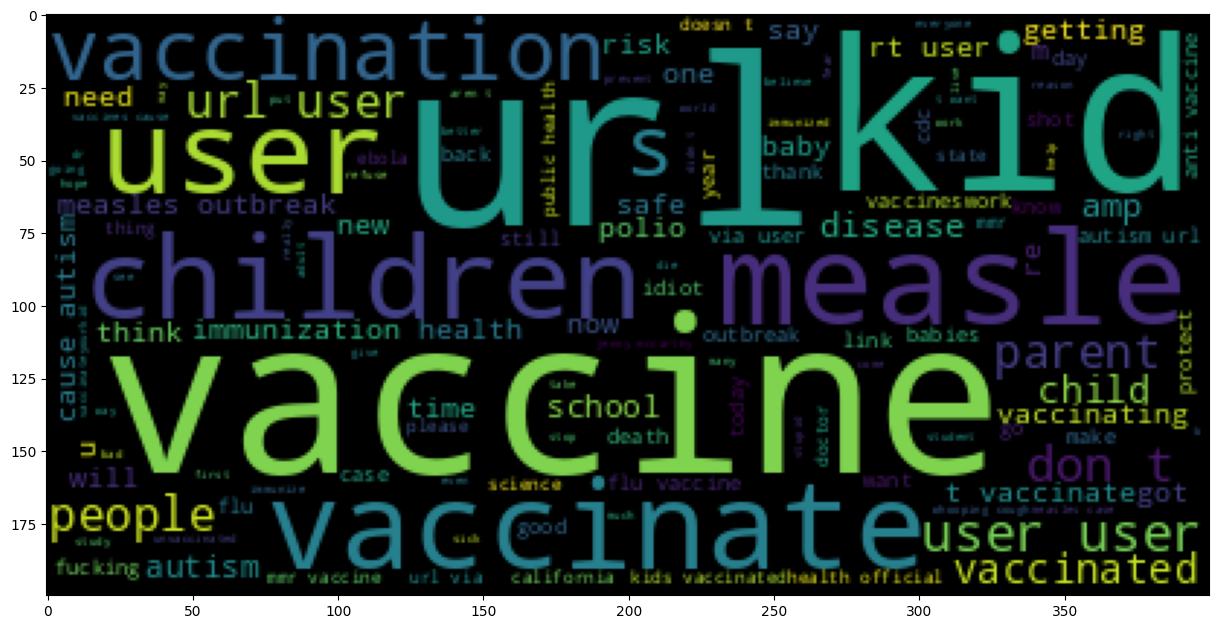

In [46]:
#Now we can plot this postive sentence cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentence_positive_string))
;

In [47]:
#the first step is to make negative sentences using a python list
negative_sentences = negative['safe_text'].tolist()

In [48]:
#Now we can join all the positive sentences we have
sentence_negative_string = " ".join(negative_sentences)

''

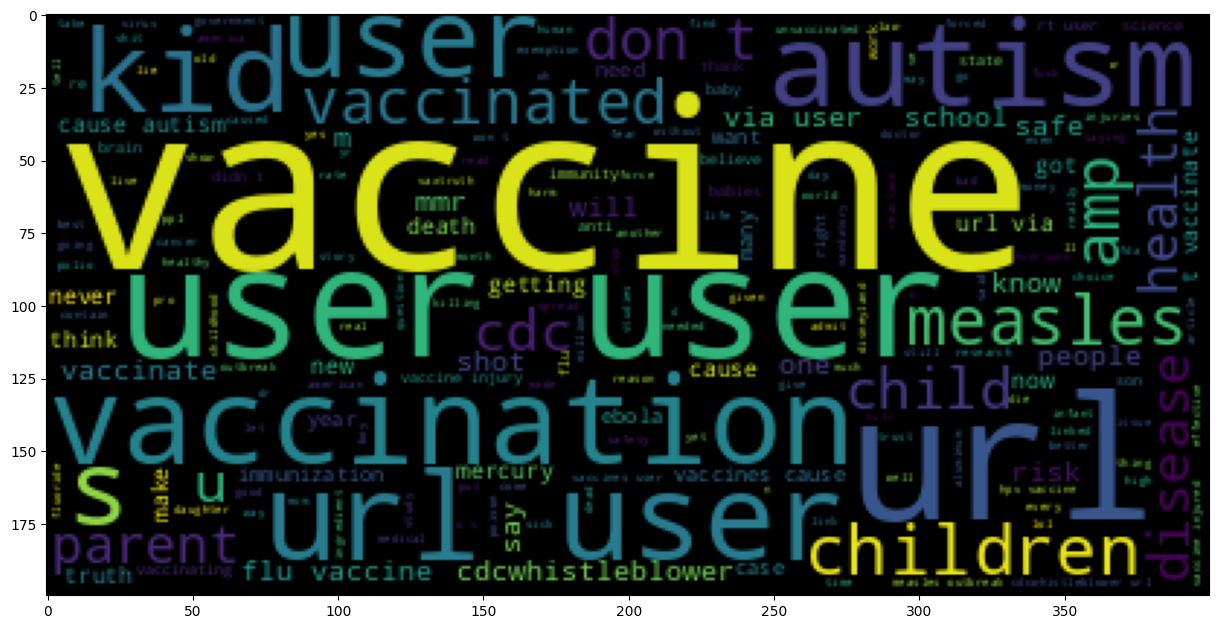

In [49]:
#Now we can plot this negative sentence cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentence_negative_string))
;

In [50]:
#the first step is to make negative sentences using a python list
neutral_sentences = neutral['safe_text'].tolist()

In [51]:
#Now we can join all the positive sentences we have
sentence_neutral_string = " ".join(neutral_sentences)

''

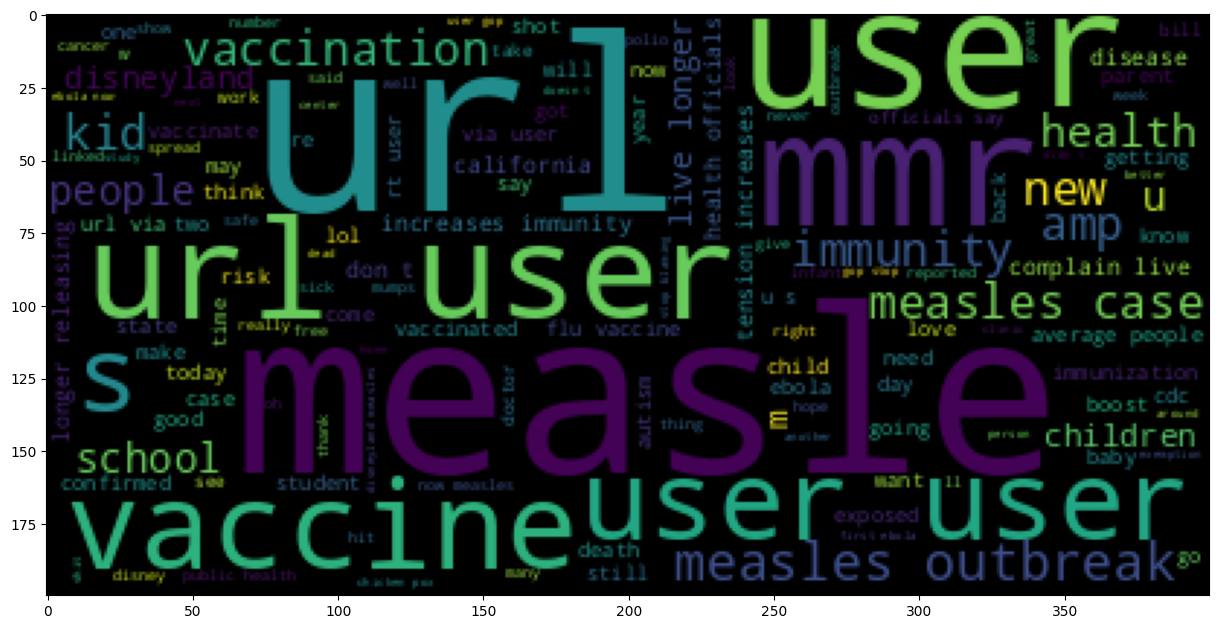

In [52]:
#Now we can plot this negative sentence cloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentence_neutral_string))
;